In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline
import numpy as np
import pandas as pd

In [25]:
#Load train/test data
# X_train = np.load('../Data/Split/X_train_3cat.npy')
# X_test = np.load('../Data/Split/X_test_3cat.npy')
# y_train = np.load('../Data/Split/y_train_3cat.npy')
# y_test = np.load('../Data/Split/y_test_3cat.npy')

X_train_psl = np.load('../Data/psl_train.npy')
X_train_tas = np.load('../Data/tas_train.npy')
y_train = np.load('../Data/nao_index_train.npy')
X_train = np.concatenate((X_train_tas,X_train_psl),axis=1)

In [23]:
data = pd.DataFrame(X_train)

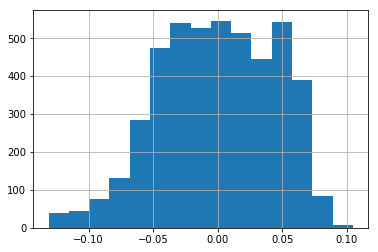

In [24]:
data.corrwith(pd.Series(y_train)).hist(bins=15)

In [6]:
data_filtered = data.transpose()
data_filtered['corr'] = data.corrwith(pd.Series(y_train))
data_filtered = data_filtered[data_filtered['corr'] > abs(0.05)]

In [7]:
data_filtered=data_filtered.drop('corr',axis=1).transpose()

In [8]:
data_filtered

,18,61,144,145,186,187,229,911,916,952,...,3499,3500,3501,3502,3503,3540,3541,3542,3543,3544
0,0.313329,0.136653,-0.592900,-0.693345,-0.034045,-0.392204,0.010040,0.766188,0.013062,0.990595,...,-0.404863,-0.442550,-0.491115,-0.484292,-0.383751,-0.511088,-0.521293,-0.500868,-0.498819,-0.522746
1,-0.632606,-0.195838,0.254103,0.187232,0.050415,-0.210146,-0.081031,0.207988,-0.617662,1.039931,...,0.837411,0.881410,0.912522,0.932526,0.934350,0.653599,0.695209,0.731269,0.769674,0.816295
2,2.687904,1.838914,1.192173,1.064663,0.631743,0.755897,0.428447,1.298233,1.141907,0.836391,...,-0.477079,-0.448736,-0.402116,-0.353287,-0.336704,-0.414118,-0.414123,-0.397081,-0.358700,-0.300432
3,-1.753309,-1.464103,-1.602422,-1.389120,-1.902634,-1.845983,-1.826624,1.495453,1.936731,1.613937,...,-0.300415,-0.253108,-0.179137,-0.077356,0.033409,-0.242287,-0.400155,-0.484170,-0.491148,-0.433103
4,0.558986,0.901215,1.038744,0.522202,0.804901,0.509403,0.394838,-0.138031,-0.093523,-0.821357,...,0.808126,0.884881,0.962063,1.015310,1.014794,0.389526,0.483645,0.569730,0.650475,0.719796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.565101,0.642944,0.291623,-0.089141,0.872648,0.494294,1.021724,0.146371,-1.003605,0.215040,...,-0.097094,0.117855,0.305139,0.416961,0.459497,-0.227315,-0.196067,-0.111917,0.041434,0.211860
896,-0.058978,0.071549,0.044428,0.139980,0.250623,0.334168,0.578463,2.631764,1.968570,2.352766,...,0.271332,0.528692,0.791606,1.035561,1.250847,-0.017396,0.100669,0.261047,0.478444,0.737539
897,0.213031,-0.094050,0.814170,0.973800,0.937190,0.973423,1.067464,1.653794,0.960461,1.160838,...,1.196861,1.186556,1.132081,1.054078,0.967661,0.673431,0.652495,0.660878,0.666185,0.629508
898,0.654738,1.017355,0.907218,0.991612,1.090568,1.336608,1.110718,1.130231,1.514727,1.303980,...,-0.412932,-0.193743,0.021833,0.205513,0.344798,-0.543353,-0.402932,-0.211770,-0.012177,0.174599


In [9]:
pca_temp = PCA(n_components=500)
pca_press = PCA(n_components=500)
X_tas_pca = pca_temp.fit_transform(X_train_tas)
X_psl_pca = pca_press.fit_transform(X_train_psl)
print('% Explained Variance (Temp): '+str(pca_temp.explained_variance_ratio_.sum()))
print('% Explained Variance (Press): '+str(pca_temp.explained_variance_ratio_.sum()))
X_train_pca = np.concatenate((X_tas_pca,X_psl_pca),axis=1)

% Explained Variance (Temp): 0.996921446012106
% Explained Variance (Press): 0.996921446012106


In [10]:
data_pca = pd.DataFrame(X_train_pca)

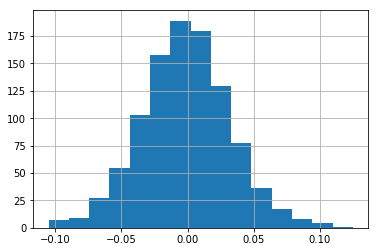

In [11]:
data_pca.corrwith(pd.Series(y_train)).hist(bins=15)

In [12]:
data_filtered = data_pca.transpose()
data_filtered['corr'] = data_pca.corrwith(pd.Series(y_train))
data_filtered = data_filtered[data_filtered['corr'] > abs(0.05)]

In [13]:
data_filtered=data_filtered.drop('corr',axis=1).transpose()

In [14]:
data_filtered

,8,29,51,73,74,82,109,122,133,139,...,902,937,950,957,970,973,974,989,996,998
0,-4.378562,-3.557220,2.505797,3.910931,0.401149,2.082438,0.425933,-0.991010,-0.935851,-0.329150,...,-0.025555,0.050655,0.018169,0.064144,0.013611,-0.022468,-0.035388,-0.000463,-0.040830,0.010069
1,3.889537,-0.977491,-0.175581,-1.230772,-1.354917,2.454985,0.345481,-0.186268,0.839150,1.563148,...,0.026965,0.044999,0.001051,-0.019169,-0.028541,0.063454,0.016495,0.006868,0.012251,-0.001768
2,-4.428771,-3.768777,-3.118636,-0.825847,0.789945,0.582072,2.174409,0.256808,-0.111400,0.934064,...,0.055752,-0.065522,0.015760,0.022309,0.006387,0.037031,0.074693,-0.008558,0.042840,0.025469
3,5.950434,-6.503438,-0.649029,1.137397,0.880669,-1.239497,-0.611414,-0.071831,1.778615,-0.803112,...,-0.022589,-0.060843,0.037374,0.055656,-0.040043,0.001008,0.066417,-0.001239,0.007161,-0.020925
4,-2.533469,0.856856,-0.647867,1.428387,1.971238,-0.733645,-1.132176,-1.292151,0.450486,-1.078441,...,0.042908,0.043194,0.028675,-0.030478,-0.045681,-0.026061,0.046689,-0.020414,-0.046278,0.029294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-5.162102,-2.579602,0.106025,0.519291,-0.806749,-0.123094,-1.001522,-1.204193,-0.678621,0.318615,...,0.030464,-0.015964,0.050412,0.036181,-0.005144,0.015618,-0.011405,0.036160,0.018833,0.043848
896,10.589662,0.491362,-2.638239,-1.830540,-1.203320,-3.490667,1.755869,0.282280,-0.412257,0.625479,...,-0.092946,0.021959,0.007959,0.002399,0.017718,-0.035080,0.012775,0.034597,-0.033419,0.015933
897,19.883583,4.054851,-1.461591,0.656419,-3.221499,0.601765,-2.435330,-0.053651,-0.422826,0.411030,...,-0.020251,0.025297,-0.013748,0.010813,0.036788,0.033886,-0.054545,0.037786,-0.027781,0.045991
898,15.425610,1.164874,-1.645204,-0.070695,1.210665,-2.501890,0.179291,-1.406496,0.255283,-1.317231,...,0.039694,-0.035276,0.025954,-0.024193,0.028073,-0.036326,-0.019239,-0.083775,-0.031308,0.036601


In [15]:
np.save('../Data/X_train_pca_0.05corr.npy', data_filtered.to_numpy())

In [18]:
# Generate and save Test/Train Data - 3categories
#X = np.load('../Data/X_train_pca_0.05corr.npy')
X = data_filtered.to_numpy()
y=np.load('../Data/nao_index_train.npy')

# med_ids = np.where(np.logical_and(-1.5<y, y<1.5))[0]
# y[y>=1.5] = 1 
# y[y<=-1.5] = -1
# y[med_ids] = 0
# y=y.reshape(-1,1)

y = np.sign(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
# Try some oversampling to combat the class imbalance
x_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(-1.0, 399), (1.0, 399)]


In [20]:
# HPO
# Random Forest ##
rf = rf = RandomForestClassifier(random_state=1337)
parameters = {'max_depth':(10, 100), 'min_samples_split':[5, 15], 'criterion':['entropy','gini']}
clf = GridSearchCV(rf, parameters)
#clf.fit(X_train_pca, y_train_cat)
#clf.fit(X_train,y_train_bin)
clf.fit(x_resampled, y_resampled)
print(clf.best_score_)
print(clf.best_params_)

0.6605188679245282
{'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 5}


In [21]:
y_pred = clf.predict(X_test)

In [61]:
confusion_matrix(y_test,y_pred)

array([[  1,  19,   0],
       [  1, 146,   0],
       [  0,  13,   0]])

# Try to see structural difference in extreme data

In [26]:
X_train_psl = np.load('../Data/psl_train.npy')
X_train_tas = np.load('../Data/tas_train.npy')
y_train = np.load('../Data/nao_index_train.npy')
X_train = np.concatenate((X_train_tas,X_train_psl),axis=1)

In [27]:
X_train

array([[-0.06110591,  0.0610764 ,  0.73893994, ...,  1.54037201,
         1.56117058,  1.58677435],
       [ 0.87799263,  0.74386078,  0.32858992, ..., -0.86966652,
        -0.9348858 , -1.00357819],
       [ 0.93284309,  0.93285674,  1.00418937, ..., -0.52977216,
        -0.59030968, -0.65216124],
       ...,
       [ 0.80617058,  0.61490536, -0.18082464, ..., -0.31879425,
        -0.28067425, -0.24717486],
       [ 0.95528752,  0.98132974,  0.83027005, ...,  1.05600476,
         1.06901383,  1.06814468],
       [ 0.63454771,  0.68039292,  0.45679122, ...,  1.87293482,
         1.81783259,  1.75402343]])

In [29]:
data_psl = pd.DataFrame(X_train_psl)
data_tas = pd.DataFrame(X_train_tas)

In [30]:
data_psl['NAO'] = y_train

In [31]:
data_tas['NAO'] = y_train

In [37]:
data_psl_highext = data_psl[data_psl['NAO']>1.4]
data_psl_lowext = data_psl[data_psl['NAO']<-1.4]
data_psl_boring = data_psl[data_psl['NAO']<abs(1.4)]

In [39]:
data_psl_highext.describe()

,0,1,2,3,4,5,6,7,8,9,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,NAO
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,-0.008756,0.028752,0.020991,0.025813,0.054942,0.090002,-0.084224,-0.042832,0.141218,0.192245,...,0.240971,0.243235,0.244893,0.245884,0.246217,0.246021,0.245466,0.244625,0.243628,1.715746
std,1.051736,1.070771,1.092175,1.110274,1.121864,1.050684,0.788546,0.857058,0.946237,0.964734,...,1.095375,1.092182,1.088565,1.084599,1.080490,1.076636,1.073579,1.071906,1.071966,0.288905
min,-3.367913,-3.299905,-3.421575,-3.459663,-3.304775,-2.840670,-1.503280,-2.159247,-2.319431,-2.182194,...,-1.943766,-1.960616,-1.975907,-1.990106,-2.003083,-2.013934,-2.021374,-2.024243,-2.020411,1.402653
25%,-0.626321,-0.633880,-0.669815,-0.726573,-0.663713,-0.555144,-0.616632,-0.503088,-0.417059,-0.339209,...,-0.339746,-0.337033,-0.338607,-0.351406,-0.388332,-0.396149,-0.367575,-0.326277,-0.339821,1.506842
50%,-0.017007,0.148404,0.033202,0.061741,0.086470,0.121443,-0.265356,-0.085889,0.138157,0.148914,...,0.178454,0.196051,0.178917,0.150936,0.156967,0.169083,0.131669,0.094593,0.090265,1.688799
75%,0.549982,0.631495,0.684936,0.672639,0.799080,0.808636,0.557847,0.399393,0.767268,0.814199,...,0.744752,0.791471,0.837894,0.873870,0.891260,0.865260,0.847027,0.837926,0.863573,1.803148
max,2.520064,2.636791,2.684172,2.933093,3.197393,1.937170,1.750018,1.887896,1.916570,2.479345,...,3.187456,3.168830,3.143075,3.111722,3.080112,3.076950,3.067794,3.051248,3.026882,2.889424


In [40]:
data_psl_lowext.describe()

,0,1,2,3,4,5,6,7,8,9,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,NAO
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,-0.065471,-0.058846,-0.085169,-0.067302,-0.040345,-0.058989,-0.040297,0.051527,0.144358,0.183832,...,-0.157199,-0.157451,-0.157930,-0.158382,-0.158763,-0.159190,-0.159790,-0.160583,-0.161554,-1.858221
std,0.942125,0.937639,0.947879,0.956311,0.949119,0.989805,0.970198,0.965920,1.033921,1.076786,...,0.958681,0.958833,0.958701,0.958540,0.958411,0.958150,0.957489,0.956189,0.954066,0.416631
min,-2.928824,-3.122071,-3.110095,-3.284003,-3.276100,-3.465212,-2.098046,-2.146434,-2.382960,-2.231576,...,-2.376611,-2.417025,-2.453970,-2.485770,-2.510361,-2.526430,-2.534007,-2.533842,-2.527000,-3.850657
25%,-0.774698,-0.697731,-0.759938,-0.731701,-0.639704,-0.597935,-0.743419,-0.674905,-0.509575,-0.420686,...,-0.834267,-0.774994,-0.784146,-0.774674,-0.756671,-0.798981,-0.813368,-0.763063,-0.727221,-2.012351
50%,-0.016223,0.001308,-0.054104,-0.003706,-0.046460,-0.009346,-0.311702,0.000037,0.225841,0.198327,...,-0.166464,-0.170895,-0.202023,-0.204388,-0.209787,-0.196505,-0.211119,-0.196983,-0.141169,-1.754151
75%,0.621653,0.522766,0.562811,0.664055,0.603114,0.558893,0.670889,0.621275,0.850263,0.915519,...,0.586883,0.605640,0.615845,0.622830,0.615222,0.588783,0.549489,0.507308,0.511508,-1.565405
max,1.867697,1.907236,1.911873,1.995071,1.878098,2.611014,2.465946,2.316410,2.011743,2.287544,...,2.050017,2.068640,2.088703,2.109220,2.129045,2.146786,2.160857,2.170448,2.174540,-1.407511


In [44]:
data_psl_boring

,0,1,2,3,4,5,6,7,8,9,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,NAO
1,-0.000334,0.045739,0.083912,0.014427,0.100375,0.360663,-0.370279,0.201830,0.863146,0.680724,...,-0.589023,-0.623465,-0.663411,-0.707518,-0.756108,-0.809893,-0.869667,-0.934886,-1.003578,0.677703
3,0.343754,0.317911,0.419571,0.604416,0.873610,0.428309,-0.220319,1.408480,1.857872,1.497680,...,1.519803,1.513404,1.501707,1.485660,1.465351,1.441236,1.412125,1.377451,1.336138,-1.225850
4,0.937262,0.864937,0.734770,0.494600,0.306662,0.681042,0.794383,0.214851,-0.266127,-0.302604,...,0.266942,0.281792,0.293290,0.301277,0.305168,0.304407,0.298844,0.288278,0.273574,0.415059
5,2.021669,2.231160,2.074997,1.808532,2.234187,2.282773,-0.461416,0.542191,1.626140,1.776608,...,-0.802318,-0.837165,-0.881911,-0.933391,-0.988470,-1.044964,-1.101225,-1.157050,-1.211991,0.188801
6,1.456358,1.478021,1.701703,1.569522,1.478997,0.314964,0.103816,0.167641,-0.010803,0.080506,...,0.052408,0.064889,0.078916,0.093595,0.108147,0.122617,0.138089,0.155559,0.176100,0.013453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-1.787574,-1.735505,-2.139880,-2.227214,-2.141091,-1.786662,0.365448,-0.264286,-0.528940,-0.320768,...,-0.804235,-0.776797,-0.749683,-0.719588,-0.685897,-0.650520,-0.617807,-0.592319,-0.577581,-0.504120
896,0.567998,0.628756,0.399878,0.056245,0.288493,0.801266,-1.005951,0.052122,1.239651,0.964085,...,-0.255543,-0.263357,-0.274997,-0.289789,-0.306395,-0.324038,-0.342092,-0.360641,-0.380185,-1.887671
897,0.425551,0.502451,0.604030,0.585036,0.623075,0.865472,0.832916,0.371732,0.109895,0.412756,...,-0.544803,-0.509633,-0.474443,-0.437861,-0.399245,-0.359070,-0.318794,-0.280674,-0.247175,0.737336
898,-0.239460,-0.400690,-0.462791,-0.452147,-0.358795,0.015060,-0.856809,-0.886237,0.041454,-0.012408,...,0.882380,0.913346,0.943628,0.973978,1.004469,1.033218,1.056005,1.069014,1.068145,-1.453879


# Nov/Dec Data

In [47]:
# pickling error
X_psl= np.load('../Data/psl_nov_train.npy', allow_pickle=True)
X_tas = np.load('../Data/tas_nov_train.npy', allow_pickle=True)
y_dec = np.load('../Data/nao_index_dec.npy', allow_pickle=True)

OSError: Failed to interpret file '../Data/nao_index_dec.npy' as a pickle